In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,HuberRegressor, Lasso, Ridge, ElasticNet
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
# remove Id column
df_train=df_train.drop(['Id'],axis=1)
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
#get numeric columns and find out null values
numericCols = df_train._get_numeric_data().columns 
num_cols_df=df_train[numericCols]

#check null values of numeric columns
tot_num_null=np.sum(num_cols_df.isnull()).sort_values(ascending=False)
tot_num_null=tot_num_null.to_frame()
tot_num_null.columns=['null_count']
tot_num_null['percent_null']=(tot_num_null.null_count/df_train.shape[0])*100
tot_num_null

,null_count,percent_null
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
SalePrice,0,0.000000
BsmtUnfSF,0,0.000000
GrLivArea,0,0.000000
LowQualFinSF,0,0.000000
2ndFlrSF,0,0.000000
1stFlrSF,0,0.000000
TotalBsmtSF,0,0.000000


In [10]:
# missing rows - missing values from any of the columns
df_train.loc[df_train.isnull().any(axis=1),]

# missing rows - missing values from all columns from an observation
df_train.loc[df_train.isnull().all(axis=1),]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [13]:
# get categorical columns and check for null values

cat_cols=df_train[df_train.columns[~df_train.columns.isin(numericCols)]]
for feature in cat_cols:
    print(cat_cols[feature].value_counts(dropna=False))
    print('*'*25)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
*************************
Pave    1454
Grvl       6
Name: Street, dtype: int64
*************************
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
*************************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
*************************
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
*************************
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
*************************
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
*************************
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
*************************
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor    

In [12]:
tot_cat_null=np.sum(cat_cols.isnull()).sort_values(ascending=False)
tot_cat_null=tot_cat_null.to_frame()
tot_cat_null.columns=['null_count']
tot_cat_null['percent_null']=(tot_cat_null.null_count/df_train.shape[0])*100
tot_cat_null

,null_count,percent_null
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
GarageCond,81,5.547945
GarageQual,81,5.547945
GarageFinish,81,5.547945
GarageType,81,5.547945
BsmtFinType2,38,2.602740


In [14]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

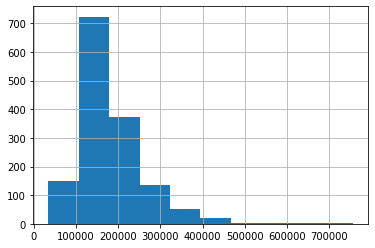

In [15]:
# checking the distribution of the sale price
df_train['SalePrice'].hist()

In [16]:
df_train['SalePrice'].skew()
df_train['SalePrice'].kurtosis()

6.536281860064529

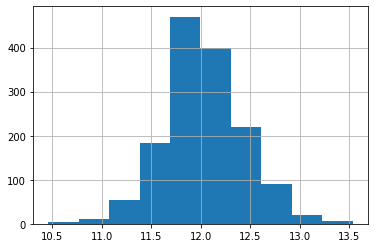

In [17]:
# applying log transformation to make it evenly distributed
np.log(df_train['SalePrice']).hist()

In [31]:
df_train['log_saleprice']=np.log(df_train['SalePrice'])

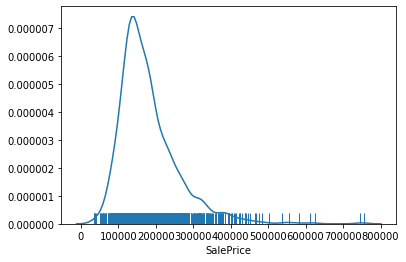

In [19]:
# checking for outliers and the distribution
sb.distplot(df_train['SalePrice'],rug=True, hist=False)

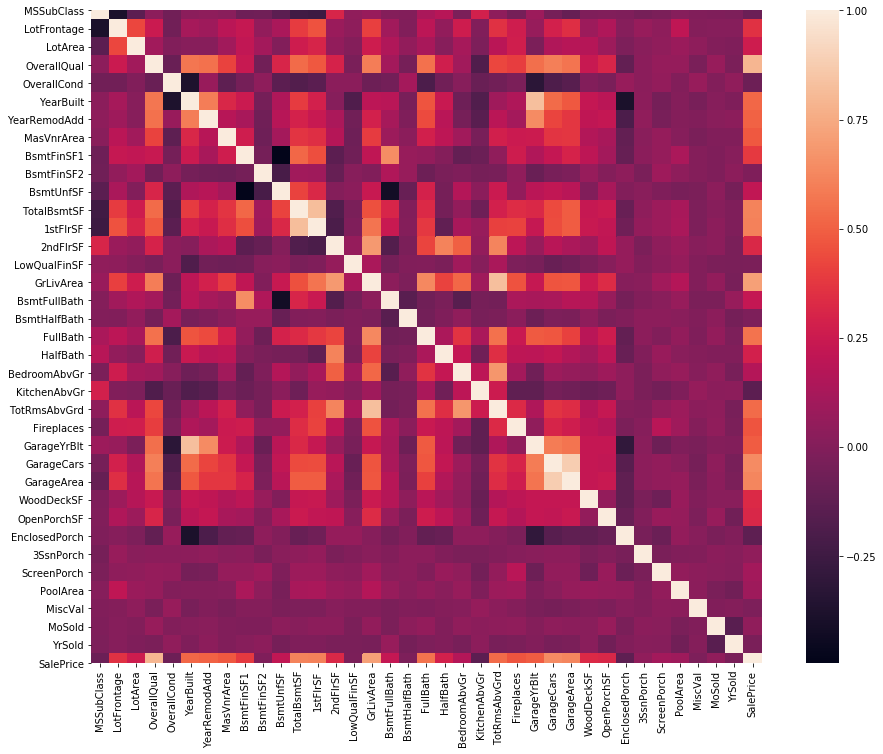

In [20]:
#Checking the correlation of features before processing the list of predictors

#correlation matrix before pro
corr_mat = df_train.corr()
plt.figure(figsize=(16,12))
sb.heatmap(corr_mat, vmax=1, square=True)

In [21]:
#Selecting highly correlated features
corr_SalePrice = abs(corr_mat["SalePrice"])
corr_features = corr_SalePrice[corr_SalePrice>0.5].sort_values(ascending=False)
#corr_features.sort_values(ascending=False)
corr_features
#df_train[corr_features.index]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

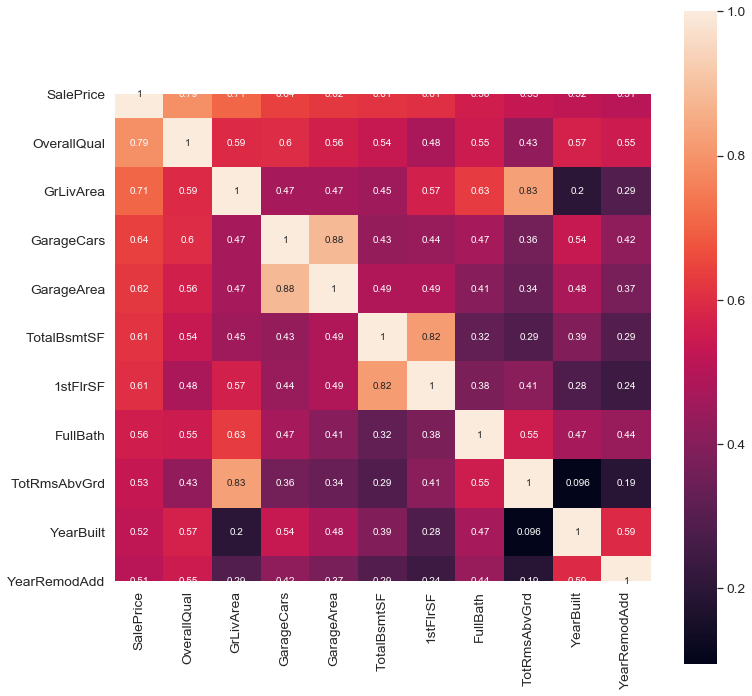

In [22]:
# plotting heatmap of highly correlated features
coff_coefs = np.corrcoef(df_train[corr_features.index].values,rowvar=False)
plt.figure(figsize=(12,12))
sb.set(font_scale=1.25)
sb.heatmap(coff_coefs,annot=True,square=True,annot_kws={'size': 10},
           yticklabels=corr_features.index.values,xticklabels=corr_features.index.values)

Overallqual and GrLivArea are strongly correlated with Sale Price


GarageCars and GarageArea are strongly correlated with Sale Price. But these two variables are stongly corrlated with each other and may cause issue of Mutlicollinearity. So one of these can be removed later on.

TotalBsmtSF and 1stFlrSF are similarly Correlated with Sale Price. Because area of the first floor may be equalant to the basement area and will represent same information, one of these can be removed.

FullBath can be kept for further investigation.

TotRmsAbvGrd can be kept for further investigation.

YearBuilt can be kept for further investigation.

YearRemodAdd can be investigated later on.

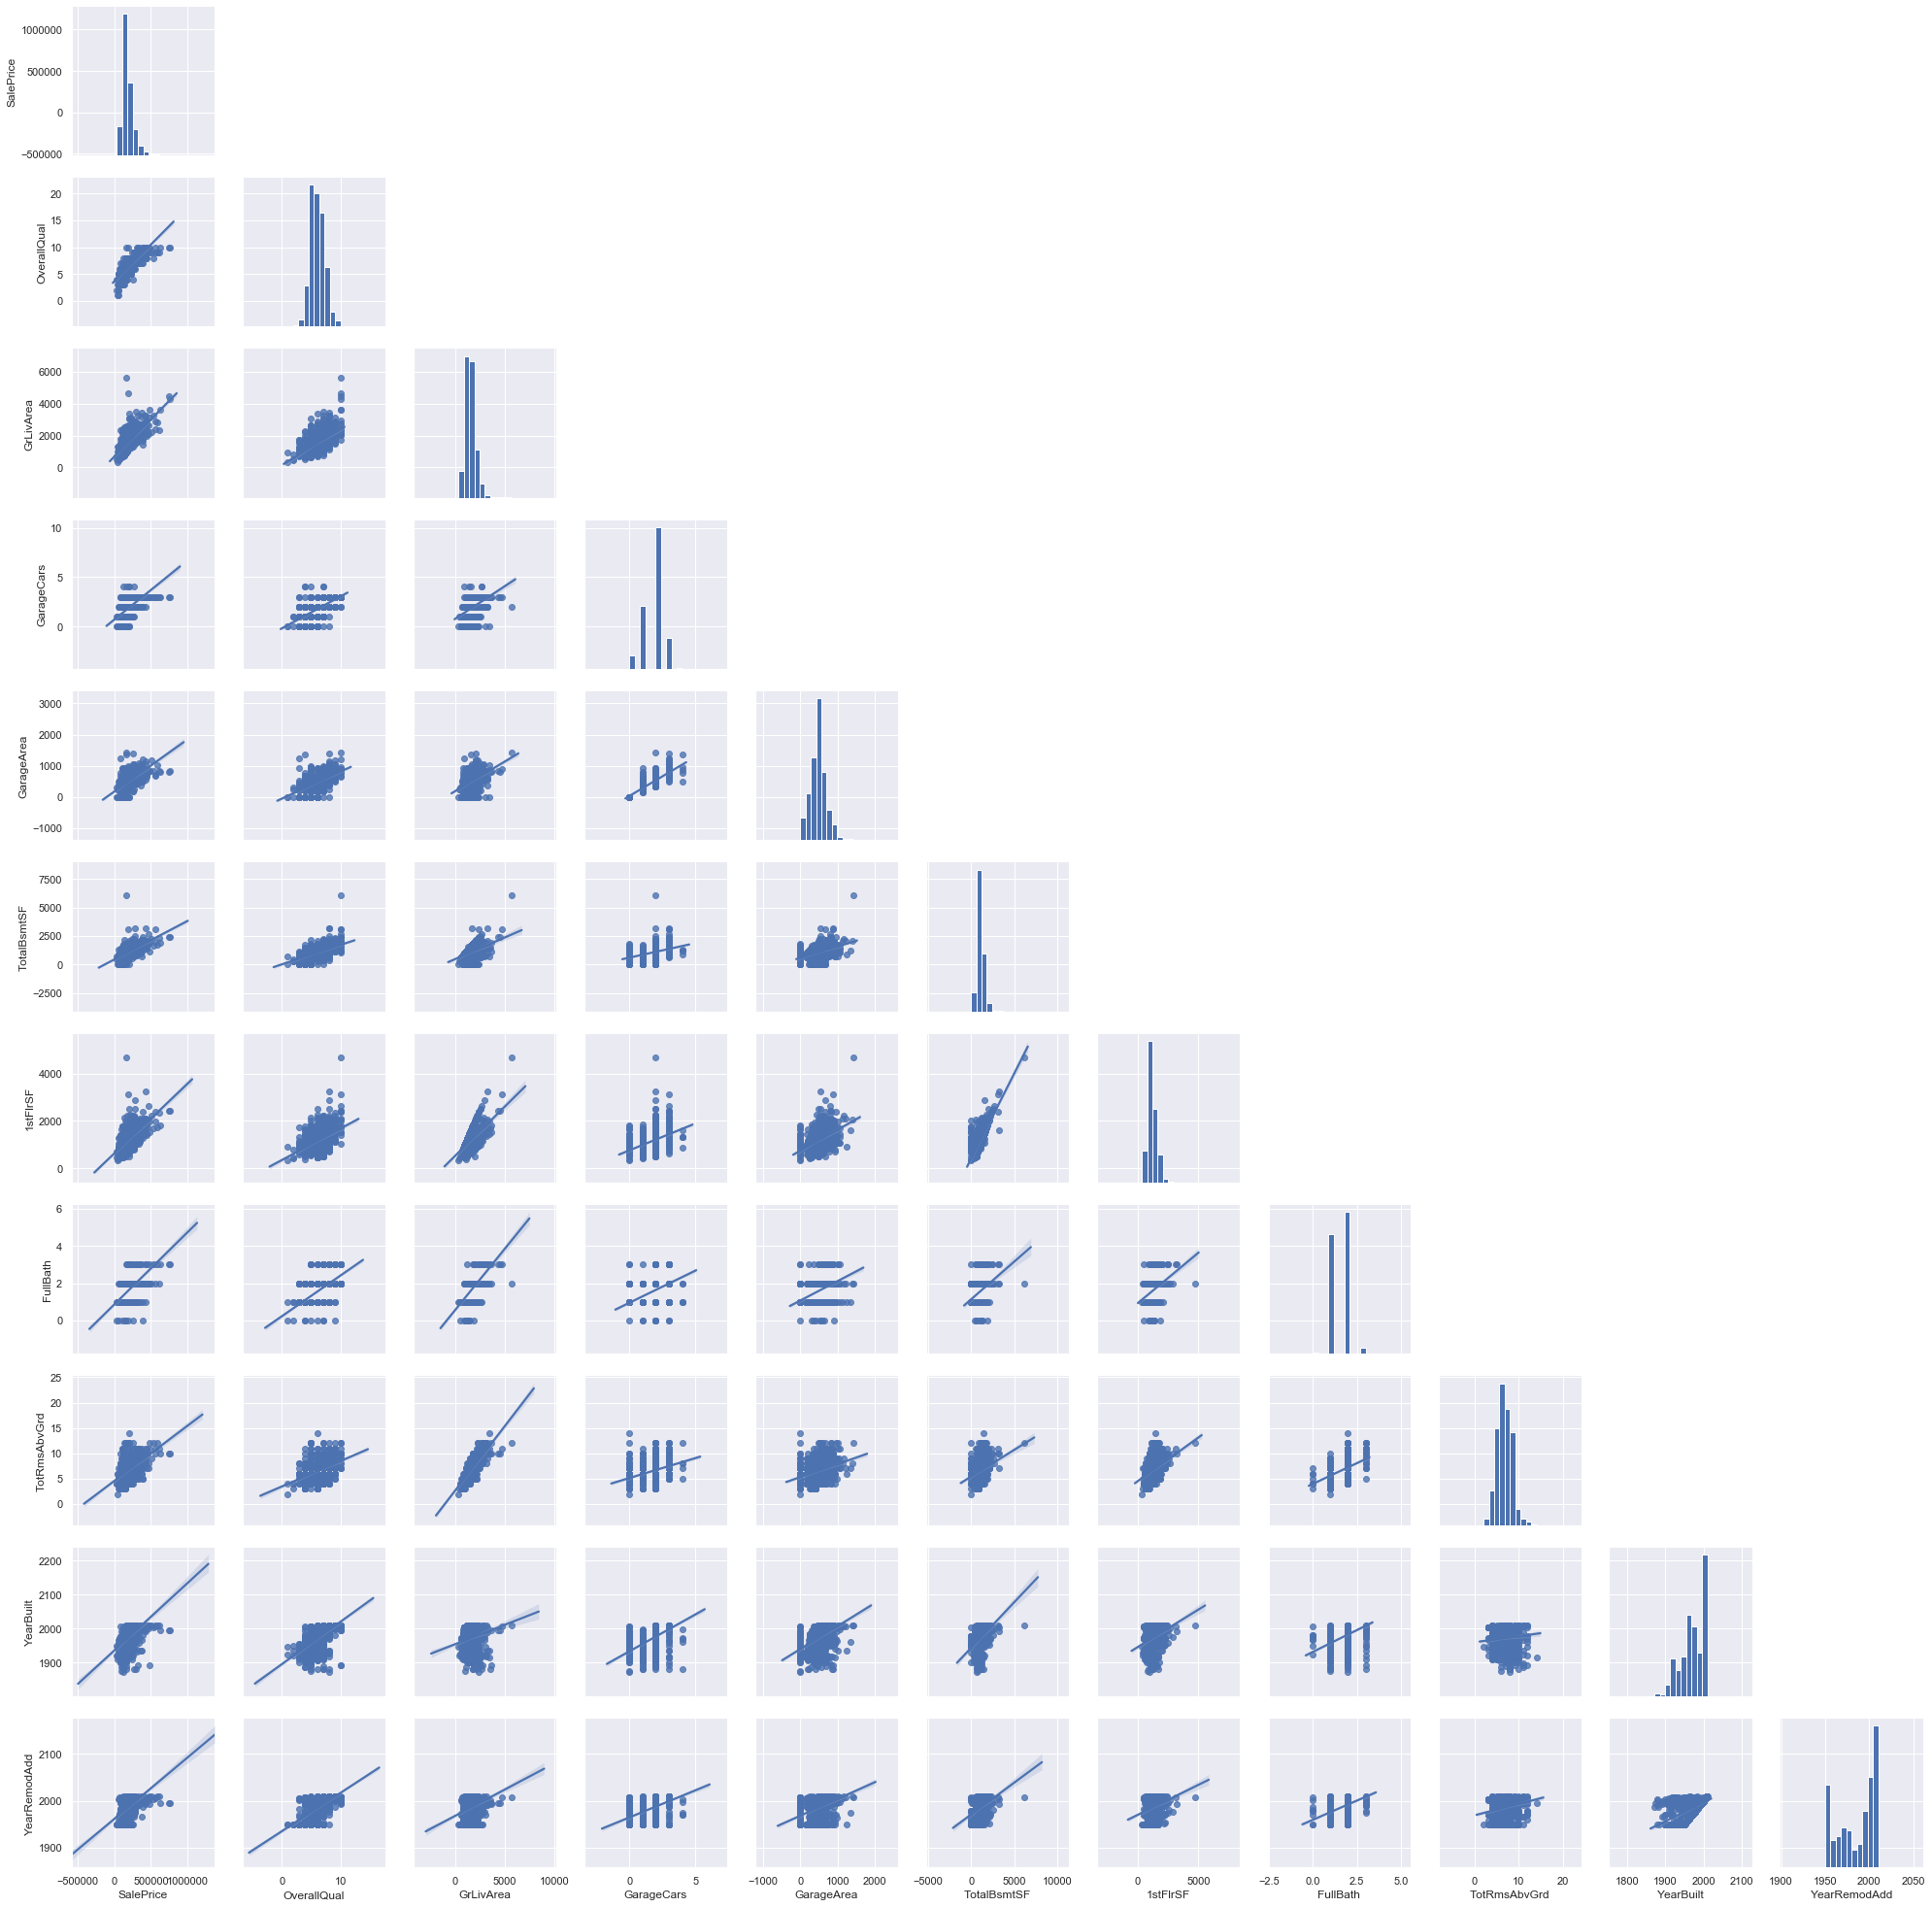

In [23]:
sb.set()
df_train_pp=df_train[corr_features.index]
g=sb.pairplot(df_train_pp, kind='reg')
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

<h3> Feature Engineering and Analysis <h>

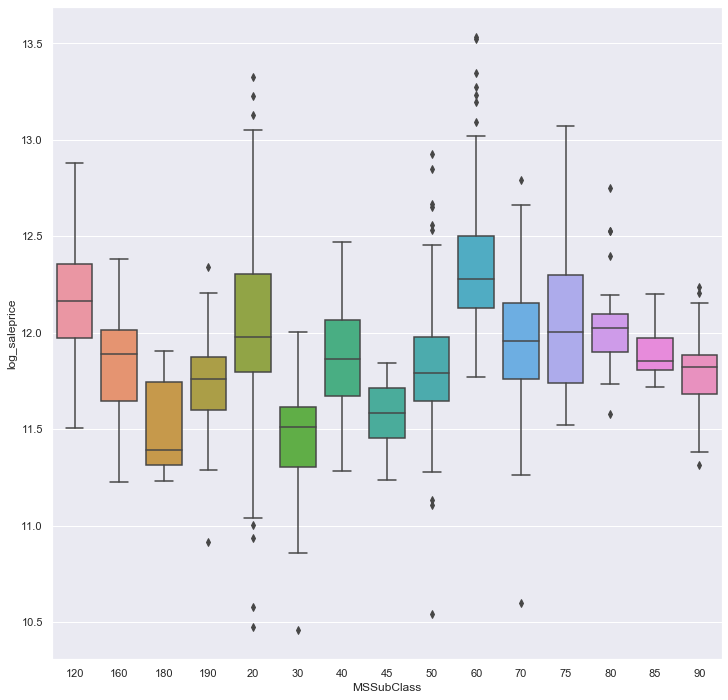

In [32]:
# Change the MSSubClass to strin variable - train
df_train['MSSubClass']=df_train['MSSubClass'].astype(str)
plt.figure(figsize=(12,12))
sb.boxplot(x=df_train['MSSubClass'],y=df_train['log_saleprice'])

In [26]:
## Change the MSSubClass to strin variable - test
df_test['MSSubClass']=df_test['MSSubClass'].astype(str)

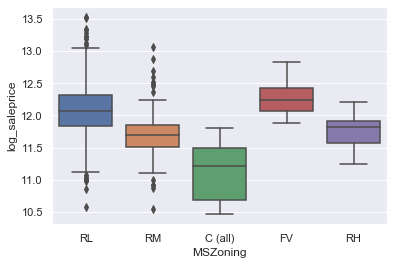

In [33]:
df_train['MSZoning'].value_counts()
sb.boxplot(x=df_train['MSZoning'],y=df_train['log_saleprice'])

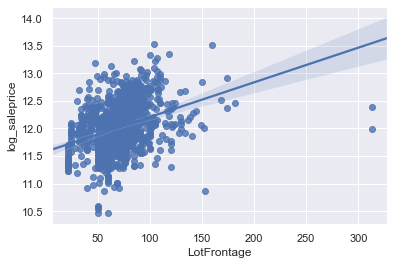

In [34]:
# fill LotFrontage null values from that of avg from Neighbourhoods - train

df_train['LotFrontage'].value_counts(dropna=False)
df_train['LotFrontage']=df_train.groupby(['Neighborhood'])['LotFrontage'].apply(lambda x:x.fillna(x.mean()))
sb.regplot(x=df_train['LotFrontage'],y=df_train['log_saleprice'])

In [29]:
#fill LotFrontage null values from that of avg from Neighbourhoods - test LotFrontage
df_test['LotFrontage'].value_counts(dropna=False)
df_test['LotFrontage']=df_test.groupby(['Neighborhood'])['LotFrontage'].apply(lambda x:x.fillna(x.mean()))

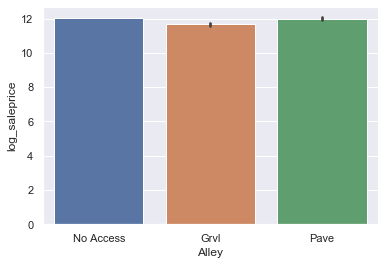

In [35]:
# Fill in the NA values of Alley with 'No Access' - train
df_train['Alley']=df_train['Alley'].fillna('No Access')
sb.barplot(x=df_train['Alley'],y=df_train['log_saleprice'])

In [36]:
#Fill in the NA values of Alley with 'No Access' - test Alley
df_test['Alley']=df_test['Alley'].fillna('No Access')

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


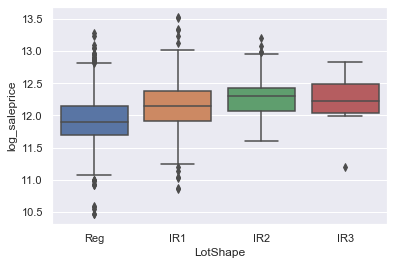

In [37]:
#train LotShape
print(df_train['LotShape'].value_counts(dropna=False))

sb.boxplot(x=df_train['LotShape'],y=df_train['log_saleprice'])

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


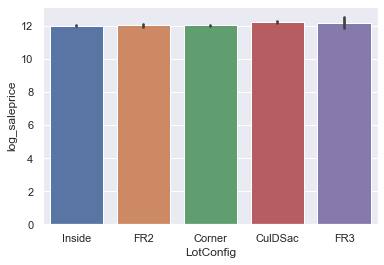

In [38]:
#train LotConfig
print(df_train['LotConfig'].value_counts(dropna=False))

sb.barplot(x=df_train['LotConfig'],y=df_train['log_saleprice'])

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


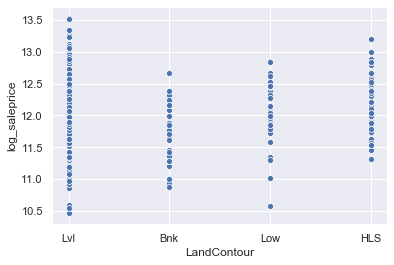

In [39]:
#train LandContour
print(df_train['LandContour'].value_counts(dropna=False))

sb.scatterplot(x=df_train['LandContour'],y=df_train['log_saleprice'])

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
2    1382
1      65
0      13
Name: LandSlope, dtype: int64


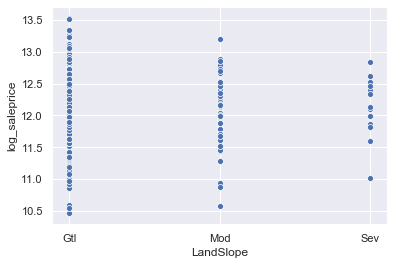

In [40]:
# Encode with ordinal values - train LandSlope
df_train1=pd.read_csv('train.csv')
df_train['LandSlope']=df_train1['LandSlope']
print(df_train['LandSlope'].value_counts(dropna=False))
sb.scatterplot(x=df_train['LandSlope'],y=df_train['log_saleprice'])

# change LandSlope to Ordinal values
df_train['LandSlope']=df_train.LandSlope.apply(lambda x: 0 if x=='Sev' else (1 if x=='Mod' else (2 if x=='Gtl' else 0)))
df_train['LandSlope']=df_train['LandSlope'].astype(int)
print(df_train['LandSlope'].value_counts(dropna=False))

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


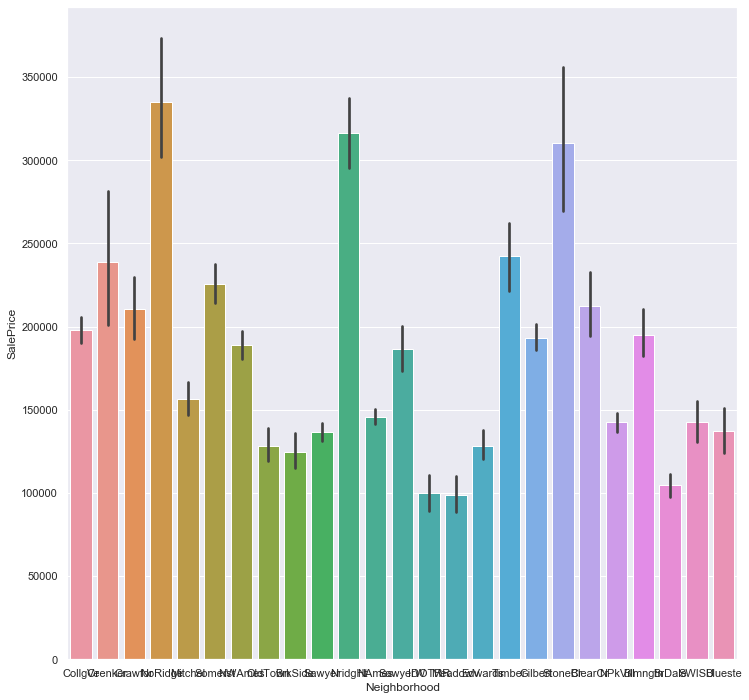

In [44]:
print(df_train['Neighborhood'].value_counts(dropna=False))
plt.figure(figsize=(12,12))
sb.barplot(x=df_train['Neighborhood'],y=df_train['SalePrice'])

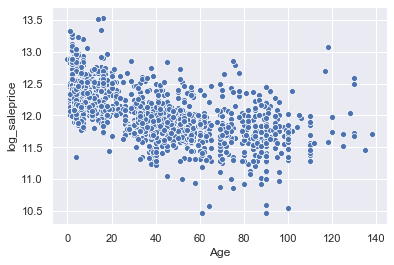

In [45]:
#Add Age column - train
#df_train['Age']=df_train['YrSold']-df_train['YearRemodAdd']
df_train['Age']=max(df_train['YearBuilt'])-df_train['YearBuilt']
df_train['Age'].value_counts()
sb.scatterplot(x=df_train['Age'],y=df_train['log_saleprice'])

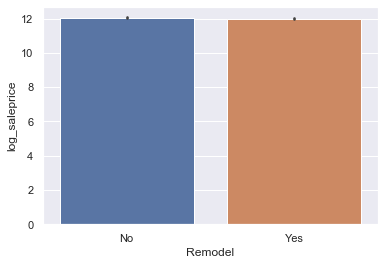

In [46]:
# Add Remodel column - train
df_train['Remodel']='No'
df_train.loc[df_train['YearRemodAdd']!=df_train['YearBuilt'],'Remodel'] = 'Yes'
df_train['Remodel'].value_counts()
sb.barplot(x=df_train['Remodel'],y=df_train['log_saleprice'])

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64


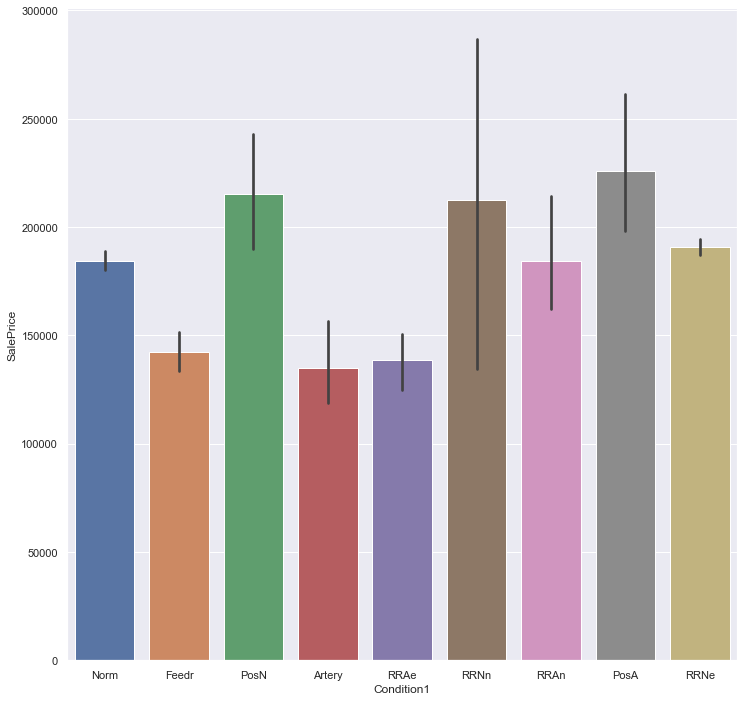

In [47]:
print(df_train['Condition1'].value_counts(dropna=False))

print(df_train['Condition2'].value_counts(dropna=False))

plt.figure(figsize=(12,12))
sb.barplot(x=df_train['Condition1'],y=df_train['SalePrice'])
# sb.set()
# sb.barplot(x=df_train['Condition2'],y=df_train['SalePrice'])

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


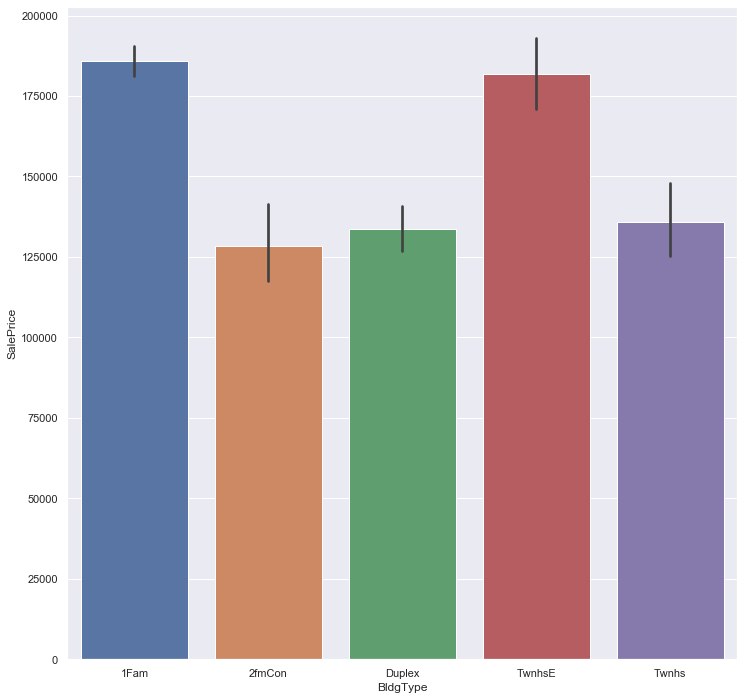

In [48]:
print(df_train['BldgType'].value_counts(dropna=False))

plt.figure(figsize=(12,12))
sb.barplot(x=df_train['BldgType'],y=df_train['SalePrice'])

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


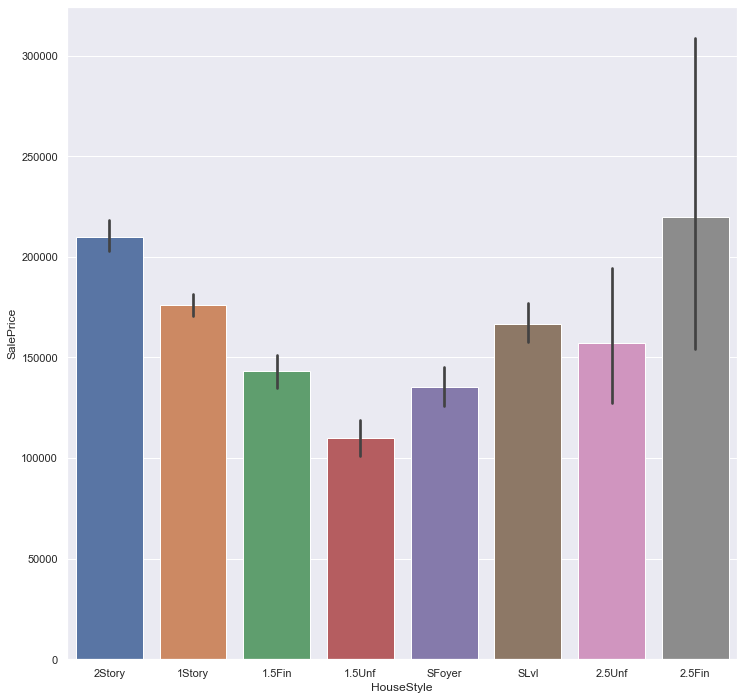

In [49]:
print(df_train['HouseStyle'].value_counts(dropna=False))

plt.figure(figsize=(12,12))
sb.barplot(y=df_train['SalePrice'].sort_values(),x=df_train['HouseStyle'])

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


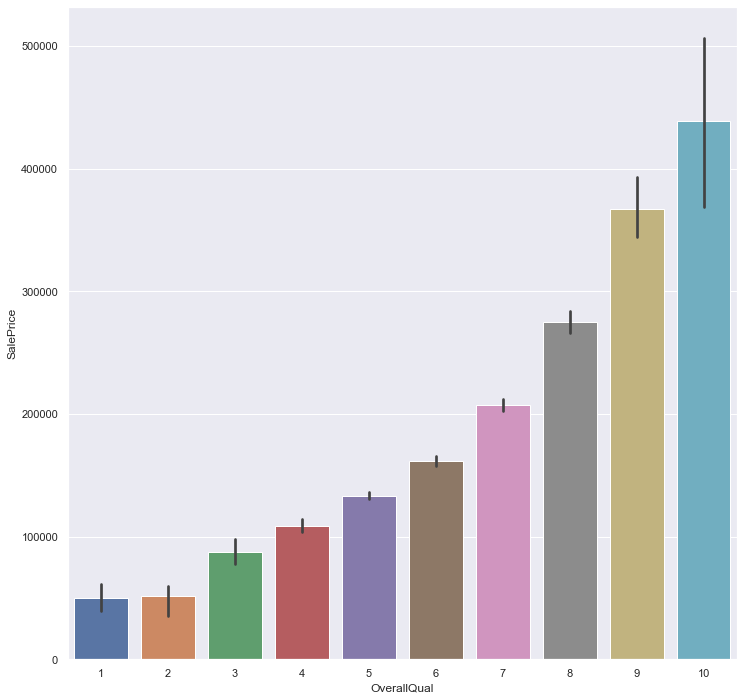

In [50]:
print(df_train['OverallQual'].value_counts(dropna=False))
plt.figure(figsize=(12,12))
sb.barplot(x=df_train['OverallQual'],y=df_train['SalePrice'])

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


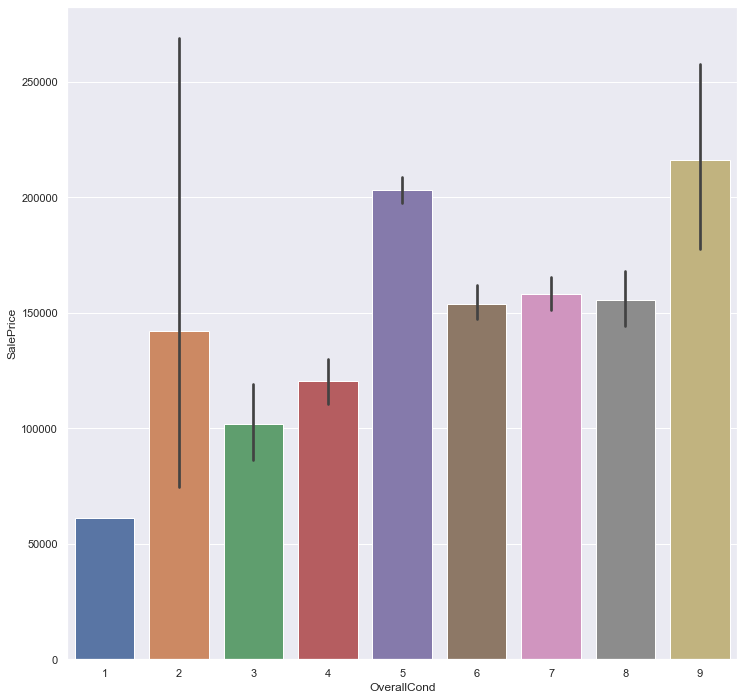

In [51]:
print(df_train['OverallCond'].value_counts(dropna=False))
plt.figure(figsize=(12,12))
sb.barplot(x=df_train['OverallCond'],y=df_train['SalePrice'])

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64


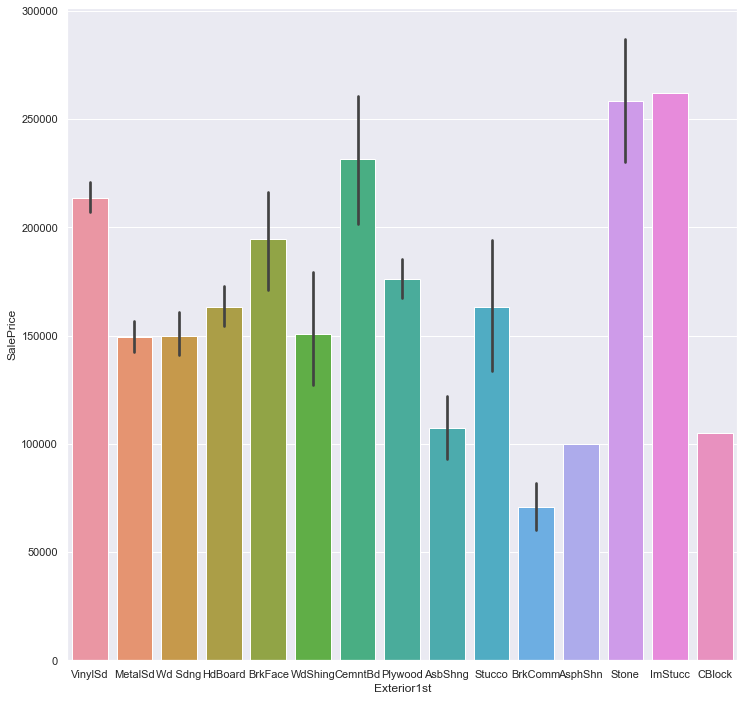

In [52]:
print(df_train['Exterior1st'].value_counts(dropna=False))
plt.figure(figsize=(12,12))
sb.barplot(x=df_train['Exterior1st'],y=df_train['SalePrice'])

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64


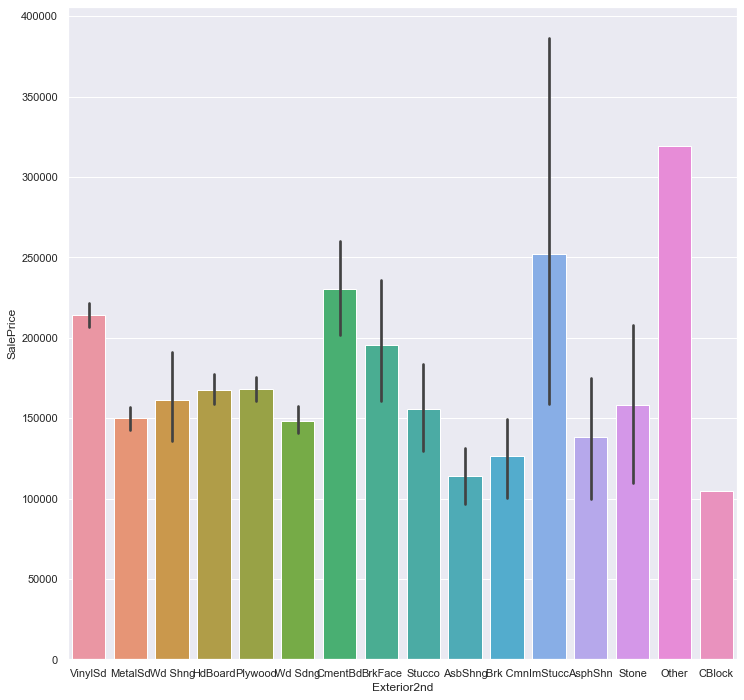

In [53]:
print(df_train['Exterior2nd'].value_counts(dropna=False))
plt.figure(figsize=(12,12))
sb.barplot(x=df_train['Exterior2nd'],y=df_train['SalePrice'])

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64


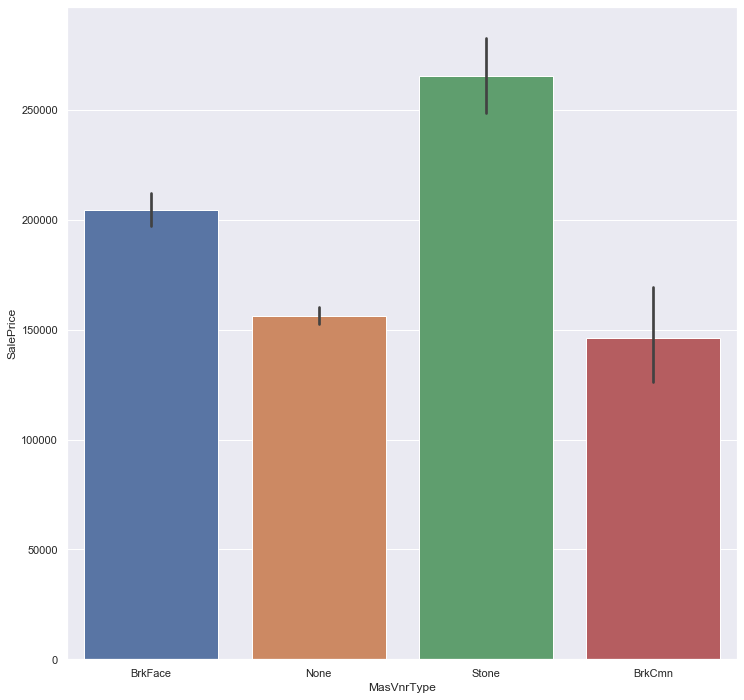

In [54]:
print(df_train['MasVnrType'].value_counts(dropna=False))
plt.figure(figsize=(12,12))
sb.barplot(x=df_train['MasVnrType'],y=df_train['SalePrice'])

In [55]:
# fill null values of MasVnrType - train and ordinalise by creating a new column
df_train['MasVnrType'].fillna('None',inplace=True)
df_train['Masonry']=df_train.MasVnrType.apply(lambda x: 0 if x in ['None','BrkCmn'] else (1 if x=='BrkFace' else 2))
df_train['Masonry'].value_counts(dropna=False)

0    887
1    445
2    128
Name: Masonry, dtype: int64

8


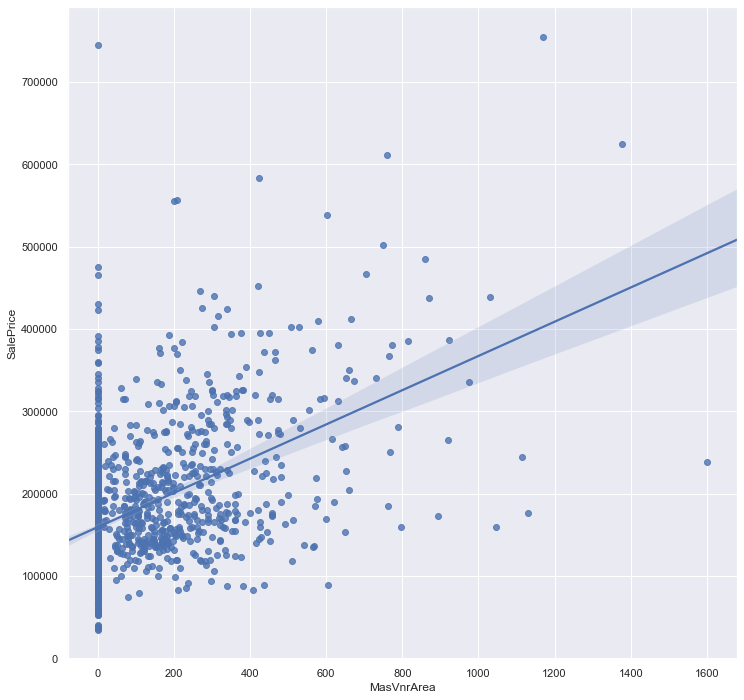

In [56]:
# Masonry Area - train
print(np.sum(df_train['MasVnrArea'].isnull()))
df_train['MasVnrArea'].fillna(0,inplace=True)

plt.figure(figsize=(12,12))
sb.regplot(x=df_train['MasVnrArea'],y=df_train['SalePrice'],fit_reg=True)

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


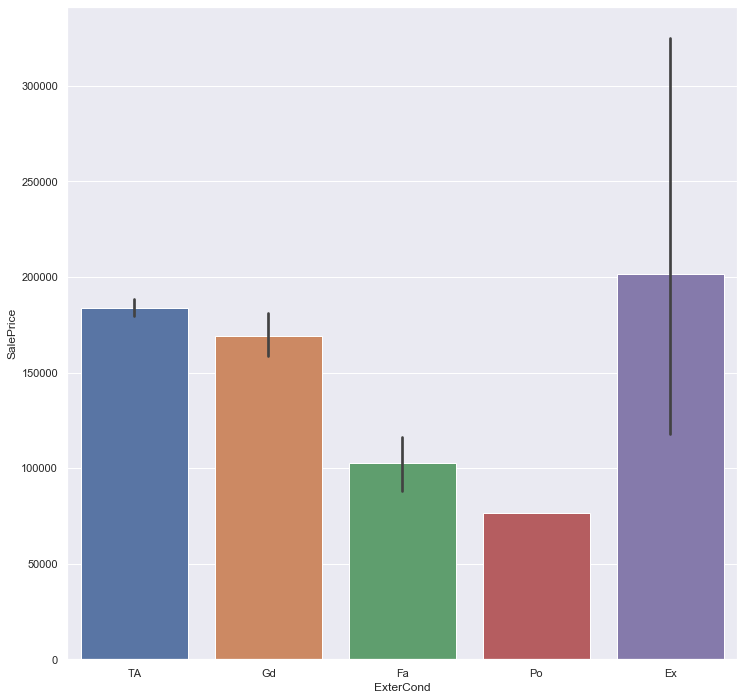

In [57]:
print(df_train['ExterCond'].value_counts(dropna=False))
plt.figure(figsize=(12,12))
sb.barplot(x=df_train['ExterCond'],y=df_train['SalePrice'])

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


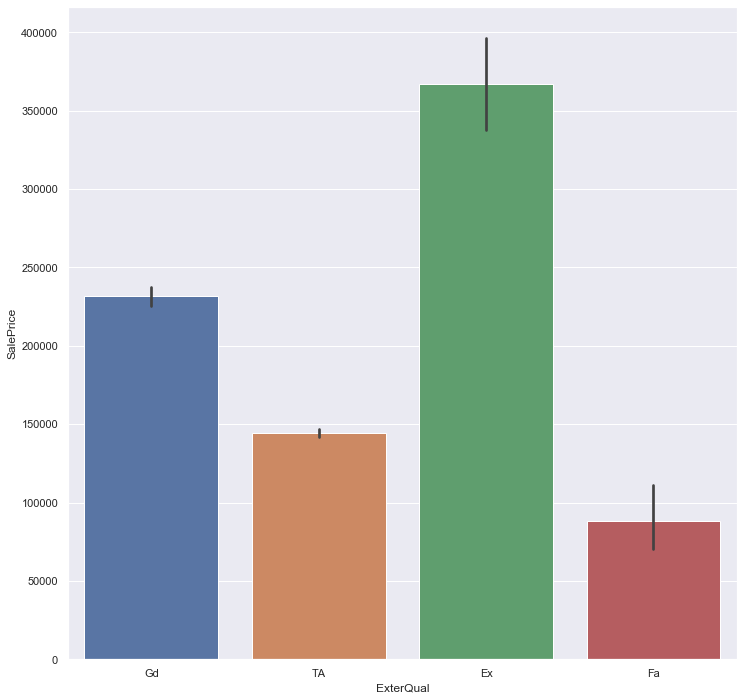

In [58]:
print(df_train['ExterQual'].value_counts(dropna=False))
plt.figure(figsize=(12,12))
sb.barplot(x=df_train['ExterQual'],y=df_train['SalePrice'])

In [59]:
#ordinalise ExternalQual and ExternalCond - train
df_train['ExterQual']=df_train.ExterQual.apply(lambda x: 0 if x=='Po' else 
                                                (1 if x=='Fa' else (2 if x=='TA' else (3 if x=='Gd' else 4))))
df_train['ExterQual']=df_train['ExterQual'].astype(int)
df_train['ExterQual'].value_counts(dropna=False)


df_train['ExterCond']=df_train.ExterCond.apply(lambda x: 0 if x=='Po' else 
                                                (1 if x=='Fa' else (2 if x=='TA' else (3 if x=='Gd' else 4))))
df_train['ExterCond']=df_train['ExterCond'].astype(int)
df_train['ExterCond'].value_counts(dropna=False)

2    1282
3     146
1      28
4       3
0       1
Name: ExterCond, dtype: int64

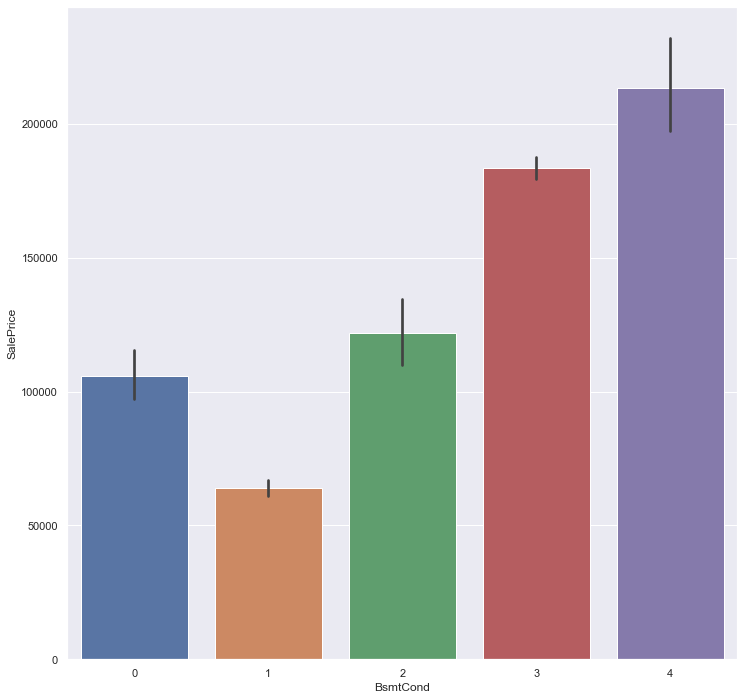

In [60]:
#ordinalise BsmtCond - train
df_train['BsmtCond']=df_train.BsmtCond.apply(lambda x: 1 if x=='Po' else 
                                                    (2 if x=='Fa' else (3 if x=='TA' else 
                                                    (4 if x=='Gd' else (5 if x=='Ex' else 0 )))))

df_train['BsmtCond']=df_train['BsmtCond'].astype(int)
df_train['BsmtCond'].value_counts(dropna=False)

plt.figure(figsize=(12,12))
sb.barplot(x=df_train['BsmtCond'],y=df_train['SalePrice'])

0       37
864     35
672     17
912     15
1040    14
        ..
1463     1
1459     1
1454     1
1019     1
2046     1
Name: TotalBsmtSF, Length: 721, dtype: int64


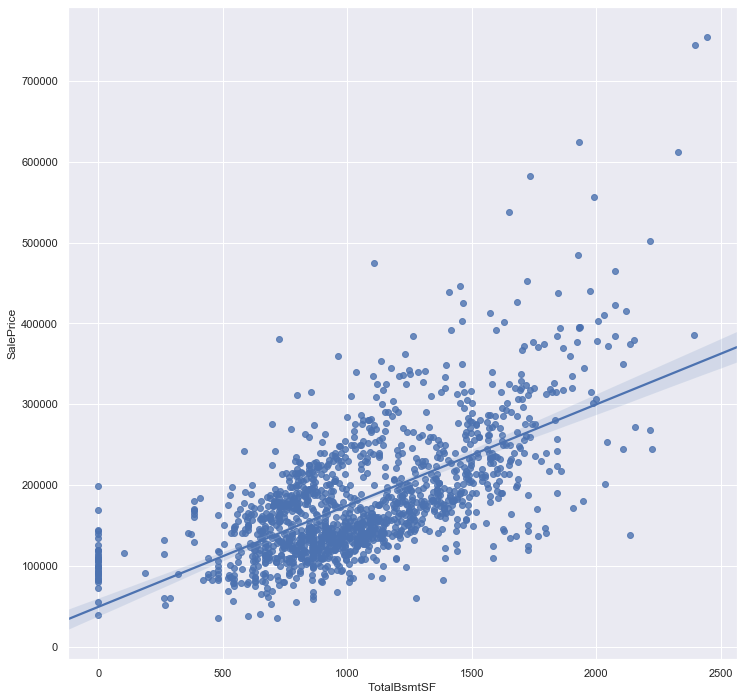

In [61]:
print(df_train['TotalBsmtSF'].value_counts(dropna=False))
x=df_train[df_train['TotalBsmtSF']<2500]
plt.figure(figsize=(12,12))
sb.regplot(x=x['TotalBsmtSF'],y=x['SalePrice'])

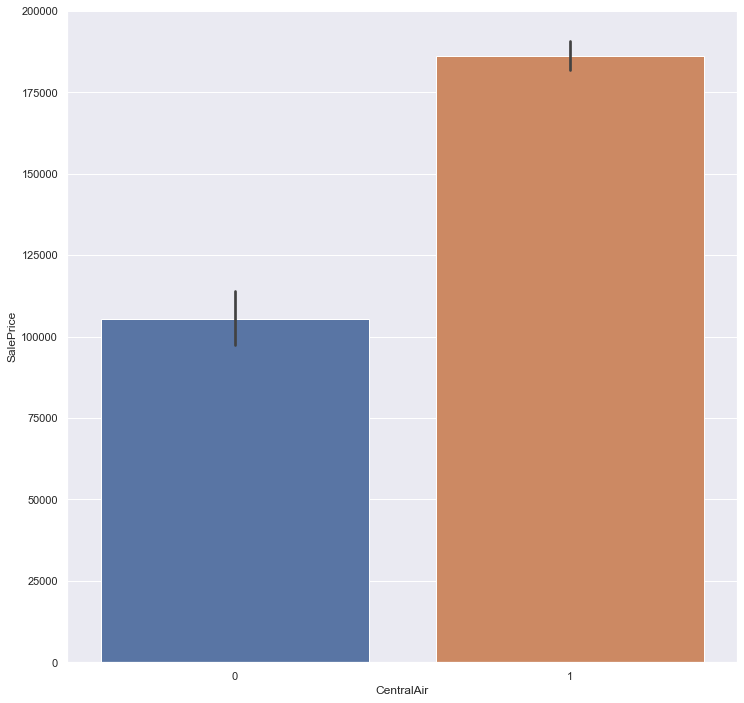

In [62]:
#ordinalise CentralAir - train
df_train1 = pd.read_csv('train.csv')
df_train['CentralAir']=df_train1['CentralAir']
df_train['CentralAir']=df_train.CentralAir.apply(lambda x: 0 if x=='N' else (1 if x=='Y' else 0))

df_train['CentralAir']=df_train['CentralAir'].astype(int)
df_train['CentralAir'].value_counts(dropna=False)

plt.figure(figsize=(12,12))
sb.barplot(x=df_train['CentralAir'],y=df_train['SalePrice'])

864     22
1040    14
894     11
848     10
1456    10
        ..
3447     1
1396     1
1395     1
1393     1
2054     1
Name: GrLivArea, Length: 861, dtype: int64


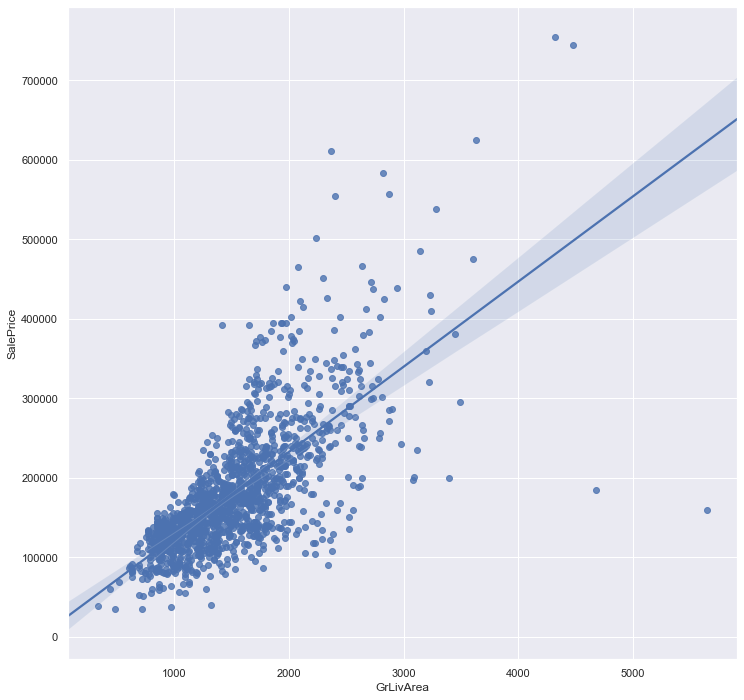

In [63]:
print(df_train['GrLivArea'].value_counts(dropna=False))
plt.figure(figsize=(12,12))
sb.regplot(x=df_train['GrLivArea'],y=df_train['SalePrice'])

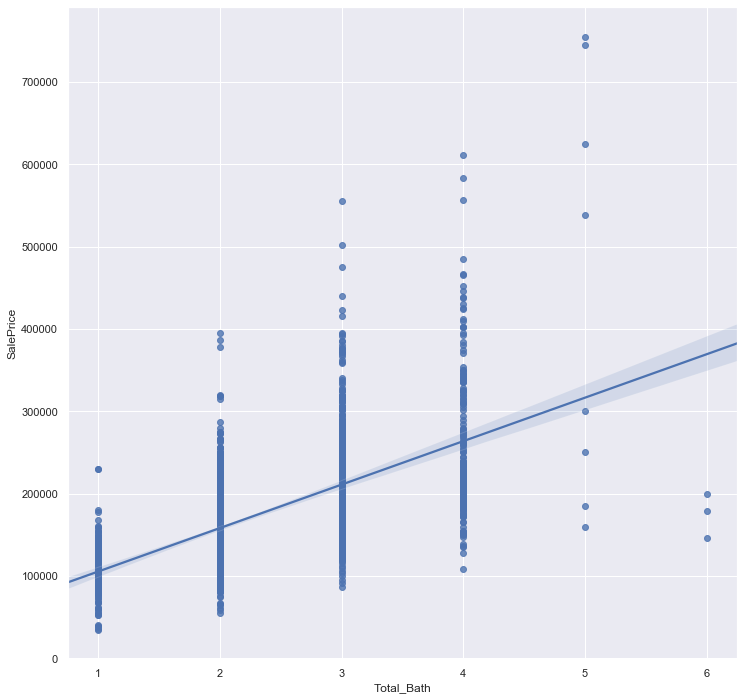

In [64]:
# Total Bath - train

df_train['Total_Bath']= df_train['BsmtHalfBath'] + df_train['HalfBath'] + df_train['FullBath'] + df_train['BsmtFullBath']
plt.figure(figsize=(12,12))
sb.regplot(x=df_train['Total_Bath'],y=df_train['SalePrice'])

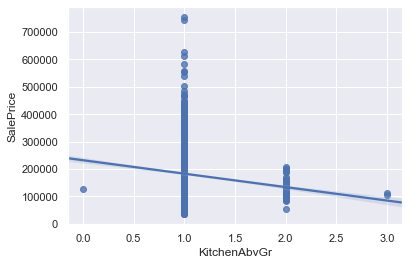

In [65]:
# Kitchen Above Ground
df_train['KitchenAbvGr'].value_counts(dropna=False)

sb.regplot(x=df_train['KitchenAbvGr'],y=df_train['SalePrice'])

2    735
3    586
4    100
1     39
Name: KitchenQual, dtype: int64


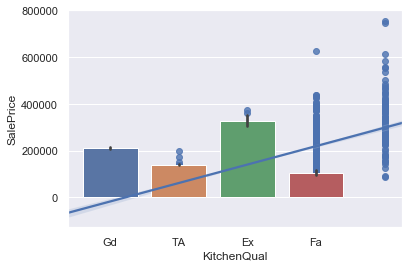

In [66]:
df_train['KitchenQual'].value_counts(dropna=False)

sb.barplot(x=df_train['KitchenQual'],y=df_train['SalePrice'])

df_train['KitchenQual']=df_train.KitchenQual.apply(lambda x: 0 if x=='Po' else 
                                                    (1 if x=='Fa' else (2 if x=='TA' else 
                                                    (3 if x=='Gd' else (4 if x=='Ex' else 0)))))

df_train['KitchenQual']=df_train['KitchenQual'].astype(int)
print(df_train['KitchenQual'].value_counts(dropna=False))
sb.regplot(x=df_train['KitchenQual'],y=df_train['SalePrice'])

0       458
36       27
40       20
48       19
45       18
       ... 
256       1
250       1
248       1
247       1
1027      1
Name: TotalPorch_SF, Length: 287, dtype: int64


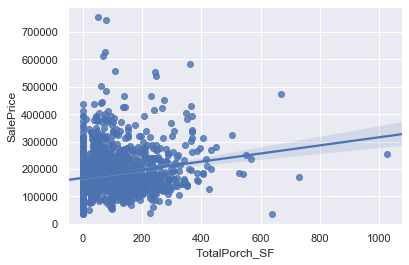

In [67]:
# total porch area except Wodden Deck - train
df_train['TotalPorch_SF'] = df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']
    
print(df_train['TotalPorch_SF'].value_counts(dropna=False))
sb.regplot(x=df_train['TotalPorch_SF'],y=df_train['SalePrice'])

0      761
192     38
100     36
144     33
120     31
      ... 
269      1
265      1
263      1
260      1
215      1
Name: WoodDeckSF, Length: 274, dtype: int64


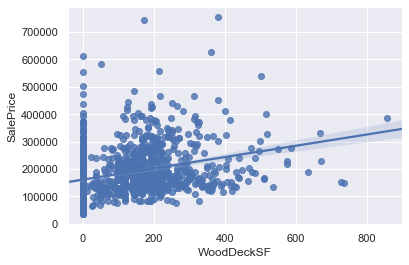

In [68]:
# Wodden Deck - train
print(df_train['WoodDeckSF'].value_counts(dropna=False))
sb.regplot(x=df_train['WoodDeckSF'],y=df_train['SalePrice'])

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64


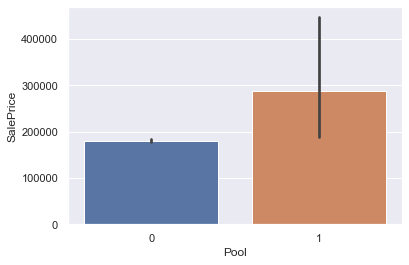

In [70]:
# Pool y/n - train
print(df_train['PoolArea'].value_counts(dropna=False))
#sb.regplot(x=df_train['PoolArea'],y=df_train['SalePrice'])


df_train['Pool']=0
df_train['Pool']=df_train.PoolArea.apply(lambda x: 1 if x >0 else 0)
sb.barplot(x=df_train['Pool'],y=df_train['SalePrice'])

0    1453
3       3
4       2
1       2
Name: PoolQC, dtype: int64


,SalePrice,OverallQual,PoolQC
0,208500,7,0
1,181500,6,0
2,223500,7,0
3,140000,7,0
4,250000,8,0
...,...,...,...
1455,175000,6,0
1456,210000,6,0
1457,266500,7,0
1458,142125,5,0


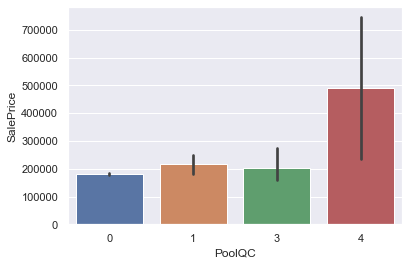

In [71]:
# Pool quality - train
df_train['PoolQC']=df_train.PoolQC.apply(lambda x: 0 if x=='NA' else 
                                                    (1 if x=='Fa' else (2 if x=='TA' else 
                                                    (3 if x=='Gd' else (4 if x=='Ex' else 0)))))

df_train['PoolQC']=df_train['PoolQC'].astype(int)
print(df_train['PoolQC'].value_counts(dropna=False))
sb.barplot(x=df_train['PoolQC'],y=df_train['SalePrice'])

df_train[['SalePrice','OverallQual','PoolQC']][df_train['PoolQC']==0]

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64


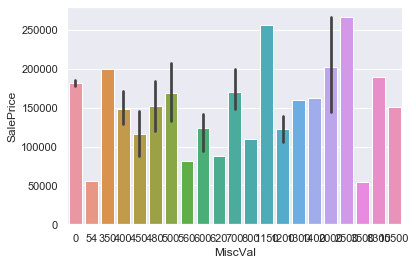

In [72]:
# MiscVal
# MiscFeature

print(df_train['MiscVal'].value_counts(dropna=False))
sb.barplot(x=df_train['MiscVal'],y=df_train['SalePrice'])

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


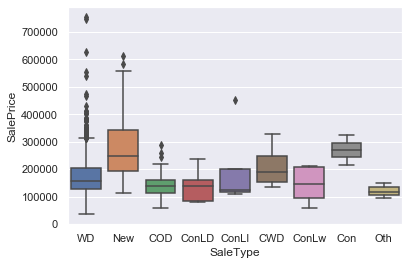

In [73]:
# sale Type
print(df_train['SaleType'].value_counts(dropna=False))
sb.boxplot(x=df_train['SaleType'],y=df_train['SalePrice'])

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


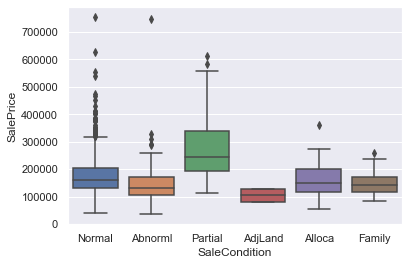

In [74]:
# Sale Condition
print(df_train['SaleCondition'].value_counts(dropna=False))
sb.boxplot(x=df_train['SaleCondition'],y=df_train['SalePrice'])

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


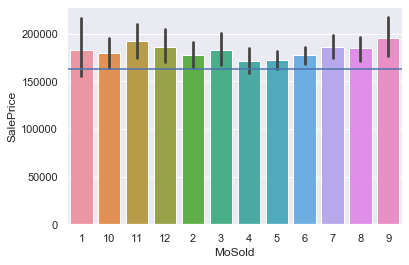

In [79]:
#MoSold - train
df_train['MoSold']=df_train['MoSold'].astype(str)
print(df_train['MoSold'].value_counts(dropna=False))
g=sb.barplot(x=df_train['MoSold'],y=df_train['SalePrice'])
g.axhline(163000)

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


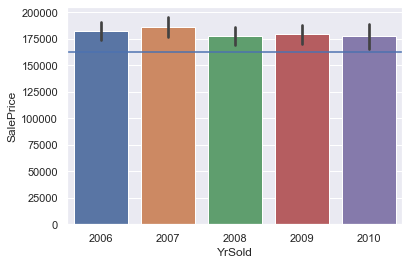

In [78]:
# YrSold - train
df_train['YrSold']=df_train['YrSold'].astype(str)
print(df_train['YrSold'].value_counts(dropna=False))
g=sb.barplot(x=df_train['YrSold'],y=df_train['SalePrice'])
g.axhline(163000)

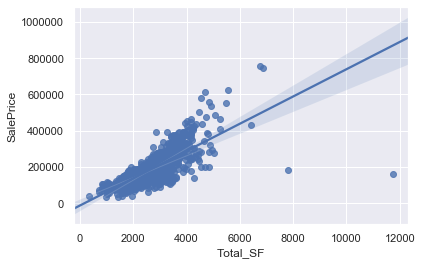

In [80]:
# Total Area above ground and basement - train
df_train['Total_SF'] = df_train['GrLivArea']+ df_train['TotalBsmtSF']
sb.regplot(x=df_train['Total_SF'],y=df_train['SalePrice'])

<h3> Correlation after feature engineering<h>

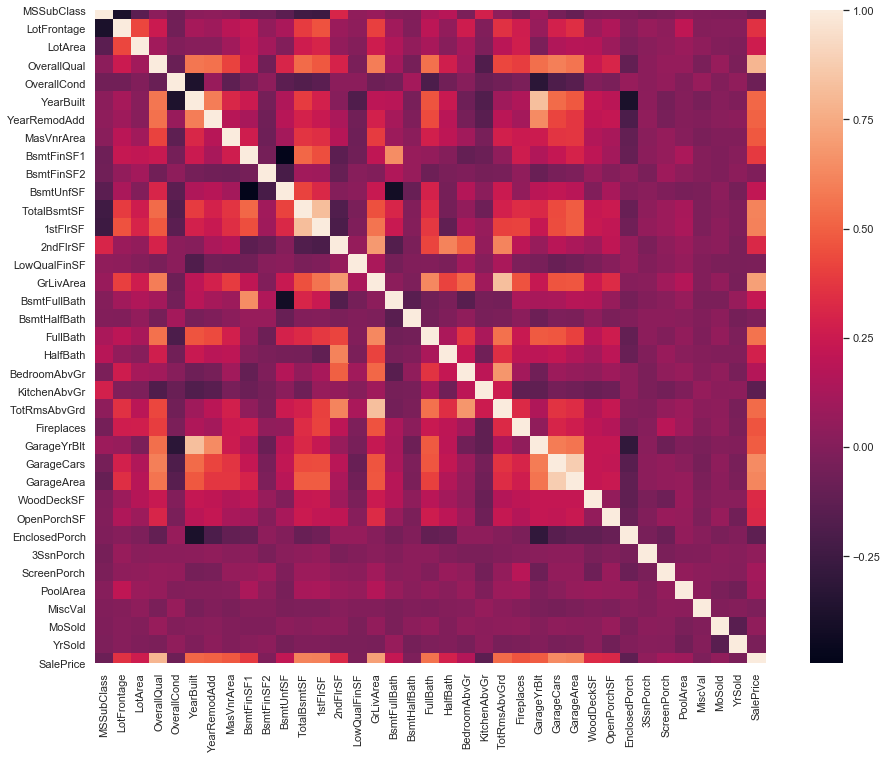

In [81]:
#correlation matrix
corr_mat2 = df_train.corr()
plt.figure(figsize=(16,12))
sb.heatmap(corr_mat, vmax=1, square=True)

Index(['SalePrice', 'log_saleprice', 'OverallQual', 'Total_SF', 'GrLivArea',
       'ExterQual', 'KitchenQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       'Total_Bath', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Age',
       'YearBuilt', 'YearRemodAdd'],
      dtype='object')

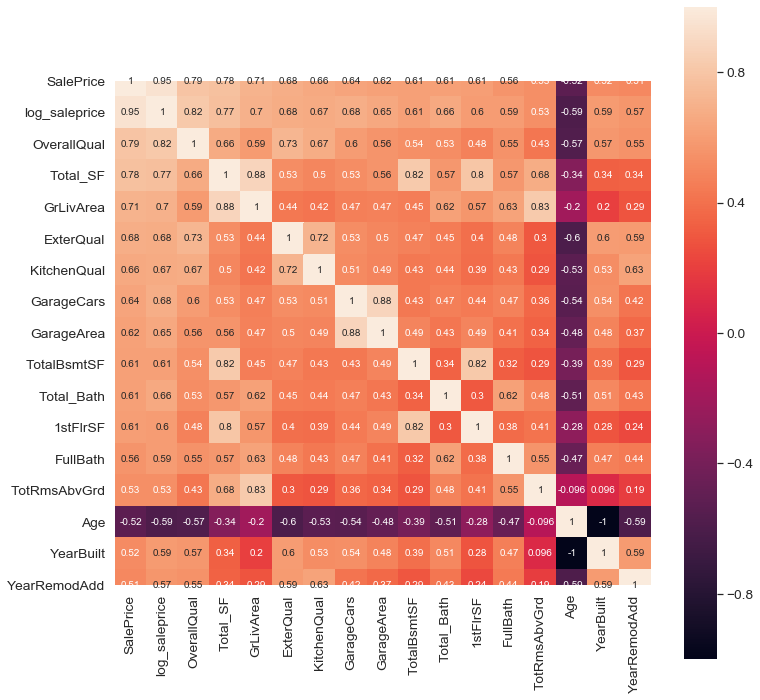

In [83]:
#Selecting highly correlated features
corr_SalePrice2 = abs(corr_mat2["SalePrice"])
corr_features2 = corr_SalePrice2[corr_SalePrice2>0.5].sort_values(ascending=False)
corr_features2.sort_values(ascending=False)
corr_features2


coff_coefs2 = np.corrcoef(df_train[corr_features2.index].values,rowvar=False)

plt.figure(figsize=(12,12))
sb.set(font_scale=1.25)
sb.heatmap(coff_coefs2,annot=True,square=True,annot_kws={'size': 10},
           yticklabels=corr_features2.index.values,xticklabels=corr_features2.index.values)

df_train[corr_features2.index].columns